# Biblioteca

In [1]:
#@title Bibliotecas importadas { form-width: "20%" }

# Manipulação de dados
import pandas as pd
from sklearn.model_selection import train_test_split

# Manipuação de vetores e matrizes
import numpy as np

# Modelos
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import ensemble
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential

# Análise matemática e estatística
from sklearn import preprocessing
from sklearn import metrics
import scipy.stats as stats
import statsmodels.api as sm
import math
from sklearn.decomposition import PCA

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Biblioteca própria { form-width: "20%" }

def matrixPrint(mat, fmt="g"):
    """Imprime matriz mat utilizando formação de string fmt.
    """
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

def dataframeNormAnalysis(df):
    """Analisa as variáveis calculando Kurtosis, skewness e teste de Shapiro-Wilker sobre os dados de cada coluna do DataFrame df e imprime o resultado.\n
    """
    result = {}

    print ("\nVariable                       skew     Kurtosis    Shapiro p\n")

    for column_name in df:
      skew = round(stats.skew(df[column_name]),3)
      kurtosis = round(stats.kurtosis(df[column_name]),3)
      W,p = stats.shapiro(df[column_name])
      print("{:<25} {:>10} {:>10} {:>10.3f}".format(column_name,skew,kurtosis,p))

    print("\n{} variables, {} samples.".format(variables,samples))

def dataframeStatNormAnalysis(df):
    """Exibe estatísticas básicas e análise de normalidade das variáveis de um Pandas Dataset.\n
    """
    result = {}

    print ("\nVariable                       Mean      StdDev        Min        Max       skew     Kurtosis    Shapiro p\n")

    for column_name in df:
      (samples, variables) = df.shape
      mean = df[column_name].mean()
      std  = df[column_name].std()
      min  = df[column_name].min()
      max  = df[column_name].max()
      skew = round(stats.skew(df[column_name]),3)
      kurtosis = round(stats.kurtosis(df[column_name]),3)
      W,p = stats.shapiro(df[column_name])

      print("{:<25} {:>10.3f} {:>10.3f} {:>10.3f} {:>10.3f} {:>10} {:>12} {:>12.3f}".format(
          column_name,mean,std,min,max,skew,kurtosis,p))
      
    print("\n{} variables, {} samples.".format(variables,samples))



# 1. Deep wine tasting

O objetivo do projeto é obter modelos de regressão destinados a estimar a qualidade de vinhos portugues com base em um dataset com 1599 amostras de vinho tinto e 4898 de vinho branco, ambos compostos de 11 variáveis de entrada com características bioquímicas de cada uma das amostras e a qualidade atribuida às mesmas por enólogos como variável de saída.

# 2. Análise do dataset

In [3]:
#@title
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                         sep=';')
round(df,3)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5


## Normalidade das distribuições 

O dataset apresenta variáveis (features) com grandes diferenças entre suas magnitudes. Além disso, há diversas unidades de medidas envolvidas. As medidas de skew e Kurtosis, bem como o teste de Shapiro-Witker permitem avaliar numericamente a forma das distribuições das variáveis.

Kurtosis é uma medida do "pico" ou "achatamento"de uma distribuição. Um valor de Kurtosis próximo de zero (0) indica uma forma próxima do normal, enquanto que valores positivos indicam uma distribuição mais pontiaguda e valores negativos, uma forma mais plana.

Skew é uma medida da assimetria da distribuição em torno da média. Distribuições com skew próximo a zero são consideradas simétricas. Valores positivos indicam que grande parte das observações estão no campo negativo da distribuição enquanto que valores positivos, no campo positivo.

Por sua vez, o teste de Shapiro-Witker para normalidade também permite verificar o quão próximo está a distribuição testada de uma distribuição normal ideal com média e desvio padrão iguais. Quando o parâmetro p do teste for maior que 0.05, a distribuição é considerada próxima da distribuição normal ideal ora descrita.







In [4]:
print("Red Wine\n")
dataframeStatNormAnalysis(df)

Red Wine


Variable                       Mean      StdDev        Min        Max       skew     Kurtosis    Shapiro p

fixed acidity                  8.320      1.741      4.600     15.900      0.982        1.125        0.000
volatile acidity               0.528      0.179      0.120      1.580      0.671        1.218        0.000
citric acid                    0.271      0.195      0.000      1.000      0.318        -0.79        0.000
residual sugar                 2.539      1.410      0.900     15.500      4.536       28.524        0.000
chlorides                      0.087      0.047      0.012      0.611      5.675       41.582        0.000
free sulfur dioxide           15.875     10.460      1.000     72.000      1.249        2.013        0.000
total sulfur dioxide          46.468     32.895      6.000    289.000      1.514        3.794        0.000
density                        0.997      0.002      0.990      1.004      0.071        0.927        0.000
pH                       


Variáveis com essas características podem prejudicar a convergência da função custo (loss) e deixar o processo de apresendizagem dos modelos lentos e/ou instáveis. Particulamente em problemas de regressão, isso pode resultar em gradientes abruptos levando à falha do processo.

Para evitar tal cenário, convém que as variáveis possuam escalas compáráveis e sejam relativamente isentas de ruídos. Essa condição existe quando as variáveis obecedem a uma distribuição gaussiana normal, ou seja, quando a média e o desvio padrão das amostras são respectivamente iguais a zero e um.

Não há amostras nulas ou com defeito, porém há amostras duplicadas.

In [5]:
#@title
# #@title
original_df = df
df = original_df.drop_duplicates()

print("Red Wine\n")
print("Original dataset shape: " + str(original_df.shape))
print("Valid dataset shape: " + str(df.shape))

Red Wine

Original dataset shape: (1599, 12)
Valid dataset shape: (1359, 12)


## Normalização das variáveis

Se evidencia então a necessidade de pré-processamento das variáveis consistindo de transformação das mesmas em variáveis com distribuição normal antes de serem utilizadas para aprendizagem dos modelos. A transformação em questão é denominada normalização (ou padronização) das variáveis, que dentre os diversos métodos existentes, o mais popular e adotado aqui é o z-score, expresso por:

$z_{x_{i}} = \dfrac{x_i-\bar{x}}{\sigma}$,

com $i=1,2,..., N$

Onde,

$N$ é o número de amostras da variável $x$

$x_i$ é a amostra da variável $x$,

$\bar{x}$ é a média do conjunto de amostras da variável $x$,

$\sigma$ é o desvio padrão do conjunto de amostras da variável $x$

$z_{x_{i}}$ é a o valor normalizado da amostra $x_i$


É importante lembrar que após procedimento, os valores de skew, Kurtosis e Shapiro p não se alteram, pois a distribuição em si não foi alterada, apenas os valores das observações.


Red Wine normalized


Variable                       Mean      StdDev        Min        Max       skew     Kurtosis    Shapiro p

fixed acidity                 -0.000      1.000     -2.137      4.371       0.94        1.041        0.000
volatile acidity               0.000      1.000     -2.238      5.742      0.728         1.24        0.000
citric acid                   -0.000      1.000     -1.393      3.723      0.312        -0.79        0.000
residual sugar                -0.000      1.000     -1.201      9.599      4.543       29.252        0.000
chlorides                      0.000      1.000     -1.542     10.593      5.496       38.478        0.000
free sulfur dioxide           -0.000      1.000     -1.426      5.372      1.225        1.881        0.000
total sulfur dioxide           0.000      1.000     -1.222      7.251      1.539        4.023        0.000
density                        0.000      1.000     -3.554      3.737      0.045        0.823        0.000
pH            

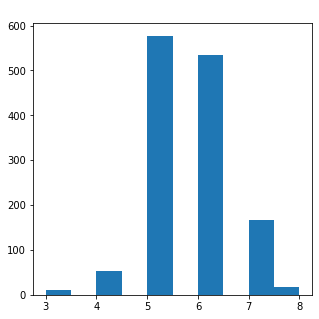

In [6]:
#@title { form-width: "20%" }

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
std_scaler = preprocessing.StandardScaler()
std_df =std_scaler.fit_transform(df)

# DataFrame com as variáveis padronizadas
std_df = pd.DataFrame(data=std_df,columns=df.columns)

plt.figure(figsize=(5,5))
#std_df['quality'].hist()
df['quality'].hist()
plt.title("Red Wine Quality",{'color': 'white'})
plt.grid(False)

print("Red Wine normalized\n")
dataframeStatNormAnalysis(std_df)

Pode-se observar que as médias e desvios padrão de todas as variáveis estão como esperado, além de também possuirem valores de magnitudes compatíveis.

Se beneficiam da normalização de variáveis algoritmos como KNN, que classificam ou estimam observações com base e métricas dimensionais e modelos de SVM, que maximizam a distância entre o plano de separação e os supporntig vectors. Em ambos os casos, a normalização evita que variáveis que alcancem valores absolutos muito altos dominem sobre as outras indevidamente.

A normalização também é fundamental ao agir como um atenuador de ruído, evitando que este se propague na saída de algoritmos e modelos.

Além disso, é uma etapa crucial para análise de componente principal, PCA, pois as variáveis originais com escalas muito diferentes prejudicam a análise covariâncias entre as mesmas. Este impacto pode ser visto comparando-se os heatmaps do dataset original e normalizado.


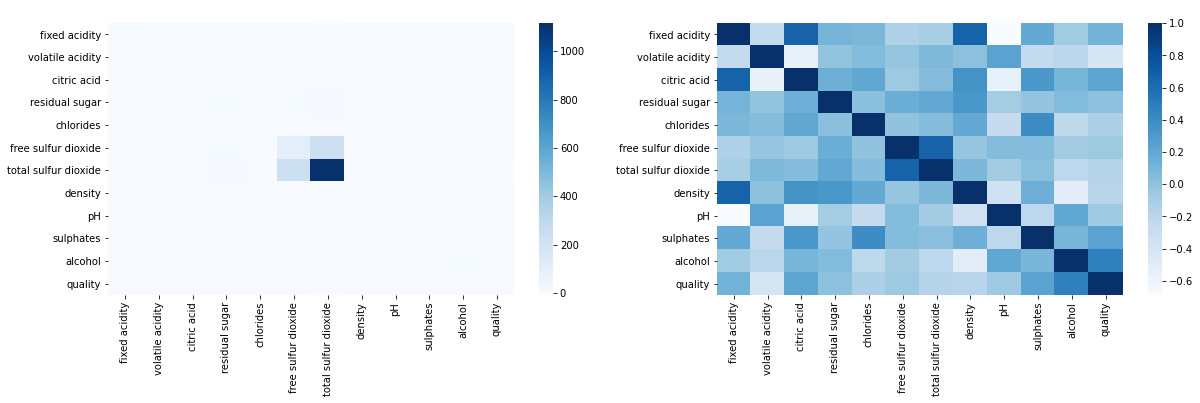

In [7]:
#@title
plt.figure(figsize=(20,5))

axis1 = plt.subplot(1,2,1)
axis1.set_title("Original red wine covariance map",{'color': 'white'})
sns.heatmap(data=df.cov(),cmap= 'Blues')

axis2 = plt.subplot(1,2,2)
axis2.set_title("Normalized red wine covariance map",{'color': 'white'})
sns.heatmap(data=std_df.cov(),cmap= 'Blues')


## Dependência entre as variáveis

Para avaliar a dependência entre as variáveis podemos empregar a análise por heatmap da correlação entre elas.



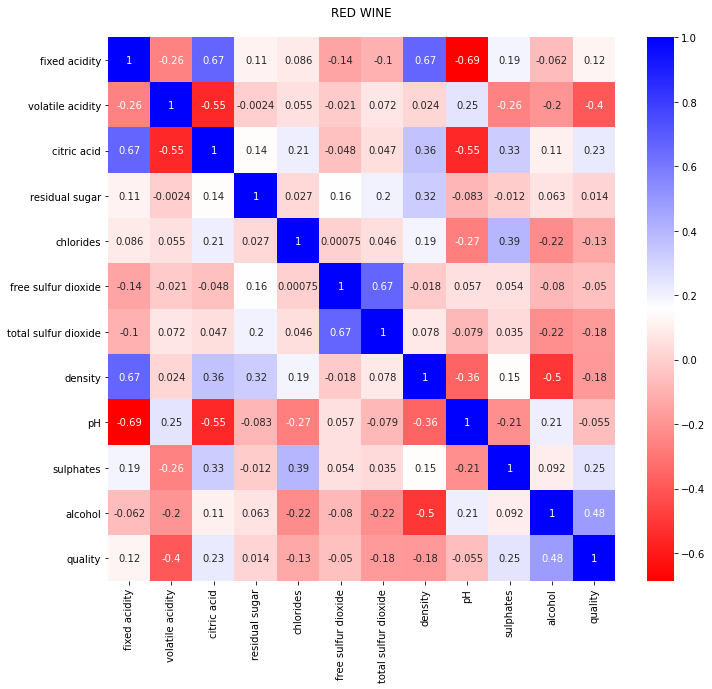

In [8]:
#@title { form-width: "20%" }
plt.figure(figsize=(25,10))

axis1 = plt.subplot(1,2,1)
axis1.set_title("RED WINE\n")
sns.heatmap(data=std_df.corr(),cmap= 'bwr_r',annot=True)

No heatmap acima, quanto mais próximo de zero for a correlação entre duas variáveis, mais indepedentes elas são entre si. Pode-se observar que, as variáveis de entrada são pouco correlacionadas. Para vinho tinto, 'pH' guarda uma correlação negativa relevante com 'fixed acid' e 'citric acid', ocorrendo o mesmo entre 'volatile acid' e 'citric acid'. Por sua vez, a variável de saída, 'quality' tem uma relação considerável com 'alchool'.



## Análise de Componente Principal, PCA

Trata-se uma das técnicas de redução de dimensionalidade mais amplamente utilizadas para reduzir a quantidade de variáveis de um dataset ao identificar evetuais correlações padrões entre as mesmas, porém preservando a maioria das informações valiosas.

**Tem o intuito de eliminar a redundância de dados no dataset, bem como capturar informações que expliquem a variabiliade das variáveis.**

Como explicado acima, antes proceder para PCA, os dados devem estar normalizados. Como pretendemos identificar a depedêncida entre variáveis supostamente independentes, devemos excluir a saída (quality), pois naturalmente ela depende das demais.




In [9]:
input_std_df = std_df.drop(columns = 'quality')

O primeiro passo da análise consiste em estabelecer a quantidade de variáveis a ser preservadas por terem maior relevância que as demais. Isso pode ser feito pela análise da covariância entre as variáveis, conforme a equação:

$cov(X,Y) = \dfrac{1}{N}[{\Sigma_{i=1}^N x_i y_i}-\dfrac{1}{N}({\Sigma_{i=1}^N x_i})({\Sigma_{i=1}^N y_i})]$

Onde $X$ e $Y$ são as variáveis consideradas para o cálculo, $n$, quantidade total de amostras, e $x_i$ e $y_i$, os respectivos valores das amostras $i... n$.

Fazendo cálculo duas a duas obtemos a matriz de covariâncias das variáveis, cujo heatmap mostrado a seguir.


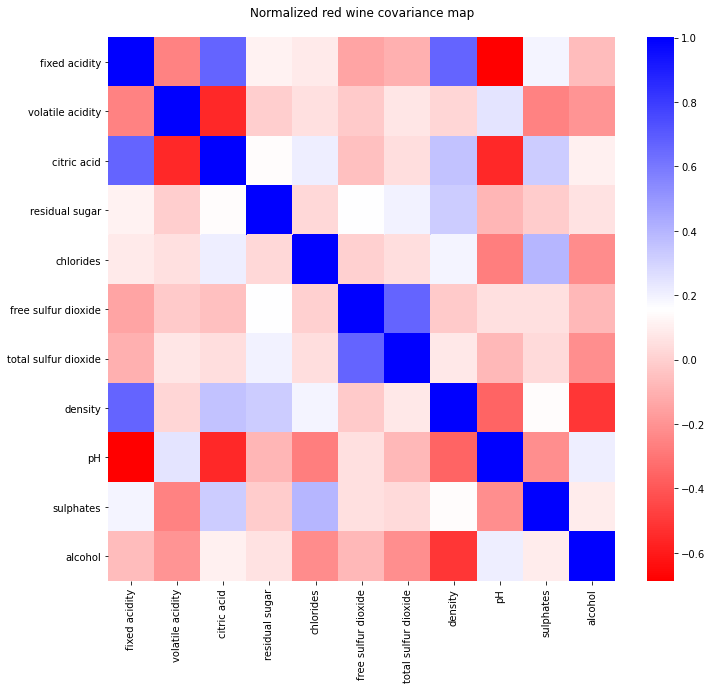

In [10]:
input_std_cov = input_std_df.cov()

plt.figure(figsize=(25,10))

axis1 = plt.subplot(1,2,1)
axis1.set_title("Normalized red wine covariance map\n")
sns.heatmap(data=input_std_cov,cmap='bwr_r')

Uma vez que uma matriz quadrada de dimensão $n$ define um espaço com $n$ dimensões, ela pode ser decomposta em $n$ autovetores, que identificam a direção dessas dimensões, e $n$ autovalores, associados a cada autovetor, que por suavez definem a escala desse espaço na respectiva dimensão.

Intuitivamente, a matriz de covariâncias generaliza a noção de variância para múltiplas dimensões. Assim, os autovetores dessa matriz indicam para 'onde' as variações estão ocorrendo e os autovalores indicam a 'intensidade' dessas variações.

Essas duas informações permitem entender quais são as variáveis, ou componentes, com maior influência sobre a variabilidade do conjunto e construir um novo espaço com dimensões reduzidas com as componentes mais siginificativas.

### Autovalores e componentes

Nesse sentido os autovalores com maior valor definem as componentes que mais contribuem para a variância, de forma que o maior autovalor é a intensidade da primeira componente principal, o segundo maior, da segunda componente principal, e assim por diante.

Dito isto, é possível calcular a contribuição relativa de cada componente divindo seu valor pelo valor total de todas as componentes e seguida avaliar a cumulativa das variáveis em ordem crescente de contribuição.


Eigenvalues and their contribution analysis:

                        lambda  relative_lambda  cumulative_lambda
fixed acidity         3.114631         0.282940           0.282940
volatile acidity      1.909631         0.173475           0.456415
citric acid           1.548489         0.140668           0.597083
residual sugar        1.251402         0.113680           0.710763
chlorides             0.961591         0.087353           0.798116
alcohol               0.638078         0.057964           0.856081
sulphates             0.587336         0.053355           0.909436
pH                    0.412384         0.037462           0.946897
density               0.344191         0.031267           0.978164
total sulfur dioxide  0.181338         0.016473           0.994638
free sulfur dioxide   0.059030         0.005362           1.000000

Cumulative eigenvalues over the variables:



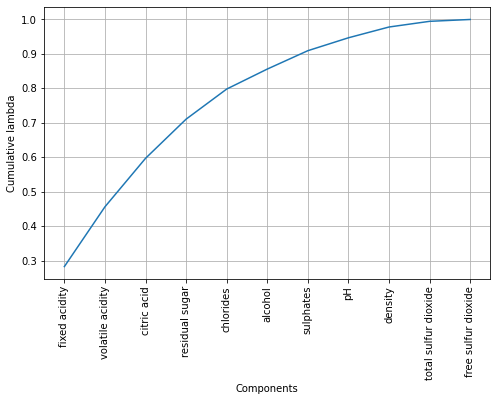

In [11]:
# Cálculo dos autovalores e autovetores da matriz de covarianças do dataset normalizado (apenas entradas)

(eigval,eigvec) = np.linalg.eig(input_std_cov)

# Montagem do DataFrama de análise de autovalores

temp = pd.Series(eigval, index=input_std_df.columns, name='lambda').sort_values(ascending=False)

eigval_info = pd.DataFrame(temp)
eigval_info.insert(loc=1,column='relative_lambda',value=temp.values/temp.sum())
eigval_info.insert(loc=2,column='cumulative_lambda',value=(temp.values/temp.sum()).cumsum())

print("\nEigenvalues and their contribution analysis:\n")
print(eigval_info)

plt.figure(figsize=(8,5))
#plt.xkcd()
plt.plot(eigval_info['cumulative_lambda'])
plt.xlabel("Components")
plt.xticks(rotation=90)
plt.ylabel("Cumulative lambda")
plt.grid(True)
print("\nCumulative eigenvalues over the variables:\n")
plt.show()


Pelos valores acumulados percebe-se que 'fixed acidity' contribui com cerca de 28,2% para a variabilidade do conjunto, sendo esta variável primeira componente principal e 'volatile acidity' com 17,5%. As duas juntas a 45,7% das contribuições. Na outra ponta, é possível encontrar as variáveis a ser removidas, sendo quantidade correspondete ao nível de contribuições do conjunto original.

Será considerado o nível de 90% além de 100% (sem eliminação) para treinamento e avaliação dos modelos. Isso significa que para o primeiro caso as variáveis 'free sulfur dioxide', 'total sulfur dioxide', 'density' e 'pH' serão eliminadas. Desta forma serão mantidas as 7 variáveis principais.

O ponto é que ao escolher manter as variáveis de maior contribuição é assumida a hipótese de que a varianica corresponde a elas é suficiente para descrever a variancia do dataset original.

Por outro lado, as perdas de informação de variancia correspondente às variáveis removidas não são relevantes ou são aceitáveis para o problema proposto de acordo com um trade off específico para cada situação.

### Redução da dimensão da entrada

Uma vez escolhidas as variáveis a serem eliminadas, a próxima etapa é obter um espaço com dimensões reduzidas $F$ correspondentes à componentes remanescentes. Isso pode ser feito projetando o espaço original $X$ sobre uma matriz de transformação $T$ formada pelos autovetores associados a tais componentes, os quais carregam consigo a informação da direção das dimensões do novo espaço. Matematicamente:

$F = XT$

com

$T = [v_1 : v_2: \ ... \ :v_{n-e}]$

Onde

$v_i$ é o autovetor da componente principal $i=1,2 \ ... \ n-e$

$n$ é a dimensão do dataset original, e

$e$ é a quantidade de variáveis eliminadas.

Assim serão estabelecidos três conjuntos de entradas, conforme mencionado anteriormente:

$F_{11} = X$

$F_{7} = XT_{7}$

onde

$T_{7} = [v_1 : v_2: \ ... \ :v_7]$




Os autovetores da matriz de covarâncias são:

In [12]:
# Impressão dos autovetores

print("\nRed wine normalized covariance matrix EIGENVECTORS:\n")

text = ""
for i in range(1,12):
  text = text + "{:>7}  ".format(i)
print(text+"\n")

matrixPrint(eigvec,"> 7.4f")

print("\nLegend:\n")
i=1
for column in input_std_df.columns:
  print("{:>2}: {:<}".format(i,column))
  i=i+1


Red wine normalized covariance matrix EIGENVECTORS:

      1        2        3        4        5        6        7        8        9       10       11  

-0.4853   0.1112   0.1286   0.2357   0.0878  -0.6436  -0.2392   0.1791  -0.1628  -0.3615   0.1079  
 0.2394  -0.2765   0.4439  -0.0728  -0.2518   0.0069   0.3608  -0.1357  -0.0643  -0.5209   0.4199  
-0.4625   0.1554  -0.2365   0.0746   0.0547   0.0819   0.6089  -0.3945  -0.3868   0.0979   0.0720  
-0.1344  -0.2379  -0.1143   0.4052  -0.7385  -0.1743   0.0998   0.0417   0.2647   0.3007   0.0123  
-0.2141  -0.1308   0.0923  -0.6538  -0.2857  -0.0598  -0.2237   0.1337  -0.3785   0.3581   0.2764  
 0.0231  -0.5125  -0.4368   0.0222   0.1601   0.0496   0.2532   0.6206  -0.2083  -0.1545  -0.0304  
-0.0360  -0.5763  -0.3273   0.0282   0.1783  -0.0691  -0.3819  -0.5871   0.0378  -0.0681   0.1597  
-0.3917  -0.2306   0.3498   0.1798  -0.1361   0.5597  -0.2457   0.0137  -0.2259  -0.1820  -0.4026  
 0.4443  -0.0022  -0.0551   0.0028  -0.2320  

In [13]:
# dataset de entrada sem alterações
X = input_std_df

# Nota sobre autovetor de linalg.eig:
# v : (..., M, M) array The normalized (unit "length") eigenvectors, such that
# the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

# Entrada com todas as variáveis
F11 = X


# Ajusta o dataset original no analisador

pca = PCA().fit(X)

# Entrada com as nove variáveis que correposnde a 90% da variância do conjunto

pca = PCA(n_components = 7)
pcs = pca.fit_transform(F11)
F7 = pd.DataFrame(data=pcs)

Os novos datasets de entrada com 9 e 7 dimensões são:

In [14]:
print("\nF11\n")

print(F11)

print("\nF7\n")

print(F7)


F11

      fixed acidity  volatile acidity  ...  sulphates   alcohol
0         -0.524431          0.932000  ...  -0.578561 -0.954374
1         -0.294063          1.915800  ...   0.124822 -0.584575
2         -0.294063          1.259934  ...  -0.051024 -0.584575
3          1.664067         -1.363534  ...  -0.461331 -0.584575
4         -0.524431          0.713378  ...  -0.578561 -0.954374
...             ...               ...  ...        ...       ...
1354      -0.869983          0.494756  ...   0.945435 -0.861924
1355      -1.215536          0.385444  ...  -0.461331  0.062574
1356      -1.388312          0.112167  ...   0.593744  0.709723
1357      -1.388312          0.631395  ...   0.300667 -0.214775
1358      -1.330720         -1.199567  ...   0.007591  0.524824

[1359 rows x 11 columns]

F7

             0         1         2         3         4         5         6
0    -1.617185  0.483047 -1.765381  0.043742  0.011270 -0.918062 -0.168433
1    -0.759750  1.851902 -0.870782  0.519611 

# Modelos de Regressão

O objetivo deste trabalho é encontrar algum modelo de regressão que consiga prever o valor da variável de saída 'quality' de forma que o erro médio absoluto (MAE) entre os valores previstos e verdadeiros seja o menor possível.

Em todos os casos, o dataset foi separado em três partes, uma para treino e validação cruzada com 4/5 do total de amostras e uma para teste com 1/5 restante. 

In [15]:
# Holdout

# Entradas

(F11_train,F11_test) = train_test_split(F11, test_size = 0.20)
( F7_train, F7_test) = train_test_split( F7, test_size = 0.20)

# Saída

Y = std_df['quality']
(Y_train, Y_test) = train_test_split(Y,test_size = 0.20)

# DataFrame para armazenar valores de métricas obtidos

results = pd.DataFrame(index=['MLP','Deep NN', 'SVM', 'DT'], columns=['F11','F7'])



## Multi-layer Perceptron

[Multi-layer Perceptron (MLP)](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron) é um algoritmo de aprendizado supervisionado que ao treinar sobre um dataset ajusta uma função

$f(\cdot):R^m \rightarrow R^o$, onde $m$ é o número de dimensões (variáveis) da entrada e $o$ é o número de dimensões da saída.

Dado um conjunto de features $X = {x_1, x_2, ..., x_m}$ e target $y$, pode aprender um aproximador de função não-linear tanto para classificação quanto para regressão.

É diferente de regressão logística, uma vez que entre as camadas de entrada e de saída pode haver um ou mais camadas internas (hidden layers).

As disvantagens de MLP incluem:

1. MLP com camadas internas possuem loss não convexa, onde pode haver mais de um mínimo local. Logo, diferentes pesos na inicialização podem levar a diferentes valores de acurácia na validação.

2. MLP necessita de sintonia de hiperparâmetros, tais como quantidade de camadas internas, de neurônios nas mesmas e de iterações.

3. MLP é sensível às magnitudes numéricas das variáveis, o que pode ser contornado com normalização das mesmas.

### Definição do modelo e ajustes de sintonia

Como dito acima, será considerado como hiperparâmetro a ser sintonizado a quantidade de neurônios, H, em uma camada interna. Foi adotado para tal camada a função de ativação logística e a loss utilizada para treino e validação é a squared-loss. Além disso, dos dados apresentados para treino, 20% será reservado para validação dentro localmente pelo MLPRegressor.

O range para sintonia é de 1 a 11 neurônios, e a avaliação de cada modelo é realizada por validação cruzada com 5 folds adotando como métrica de scoring o erro médio absoluto, MAE. O modelo escolhido com menor MAE é então retreinado com todo o dataset de treino.

In [16]:
# Define o modelo de rede neural sobre o qual será realizada a sintonia de H (hiperparâmetro)

# MLPRegressor:
#   Multi-layer Perceptron regressor. This model optimizes the squared-loss using
#   LBFGS or stochastic gradient descent.
# Rede neural com uma camada interna (hidden layer) cuja quantidade de neurônios
# Função de ativação logistic e otimizador bfgs foram escolhidos por Cortez, et al.

# Notas sobre MLPRegressor

# The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training
# samples or more) in terms of both training time and validation score. For small datasets, however,
# ‘lbfgs’ can converge faster and perform better.

# batch_sizeint, default=’auto’: Size of minibatches for stochastic optimizers.
# If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

NN_regressor = MLPRegressor(hidden_layer_sizes=[1],
                            activation='logistic',
                            solver='sgd',
                            max_fun = 15000,
                            max_iter = 1000000,       # epochs
                            tol = 1e-5,
                            early_stopping = True,
                            validation_fraction = 0.2,
                            verbose = False,
                            random_state = 3,
                            batch_size = 200
                          )

# Configura o processo de tunnig de H no modelo de rede neural
# GridSearchCV
# Executa cross-validation em um estimator de forma iterativa sobre um conjunto de hiperparâmetros
# O range de H é o mesmo adotado por Cortez, et al. como de 1 a 11.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameters = {'hidden_layer_sizes': [1,2,3,4,5,6,7,8,9,10,11]}
Kcv = 5
modelNN = GridSearchCV(estimator= NN_regressor,
                       param_grid= parameters,
                       cv= Kcv,
                       scoring= 'neg_mean_absolute_error',
                      )



### Treinamento e teste com dataset F11

In [17]:
bestNN_11 = modelNN.fit(F11_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestNN_11.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_hidden_layer_sizes','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestNN_11.predict(F11_test))

results['F11']['MLP'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F11: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()


 Mean absolute error of predictions made by model fitted with F11: 0.8228



,7,0,6,4,9,1,8,5,3,2,10
rank_test_score,1,2,3,4,5,6,7,8,9,10,11
param_hidden_layer_sizes,8,1,7,5,10,2,9,6,4,3,11
mean_test_score,-0.844861,-0.846673,-0.847785,-0.847862,-0.848057,-0.848927,-0.849977,-0.850326,-0.851392,-0.85236,-0.854131
std_test_score,0.01365,0.0146071,0.0163702,0.013465,0.0136354,0.0176394,0.00974172,0.0121528,0.0145191,0.014417,0.0139415
split0_test_score,-0.846323,-0.849548,-0.855456,-0.857759,-0.859031,-0.863093,-0.855851,-0.85115,-0.863934,-0.859379,-0.862688
split1_test_score,-0.836846,-0.827256,-0.826108,-0.830157,-0.82675,-0.820998,-0.843544,-0.848098,-0.833737,-0.838318,-0.835516
split2_test_score,-0.823235,-0.832426,-0.830204,-0.832989,-0.837251,-0.840774,-0.83424,-0.83006,-0.838086,-0.832611,-0.840296
split3_test_score,-0.859439,-0.860569,-0.862313,-0.856316,-0.855883,-0.848299,-0.855104,-0.854557,-0.849685,-0.861039,-0.859945
split4_test_score,-0.858464,-0.863569,-0.864845,-0.86209,-0.861368,-0.87147,-0.861143,-0.867767,-0.871518,-0.870456,-0.872211



Best estimator loss and validation:



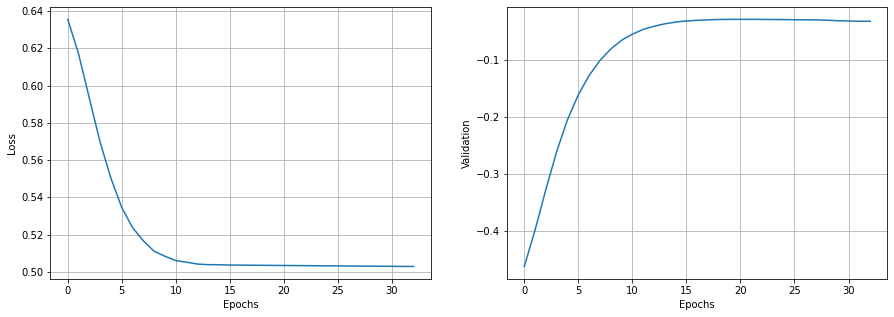

In [18]:
print("\nBest estimator loss and validation:\n")

plt.figure(figsize=(15,5))

axis1 = plt.subplot(1,2,1)
plt.plot(bestNN_11.best_estimator_.loss_curve_)
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("Loss")

axis2 = plt.subplot(1,2,2)
plt.plot(bestNN_11.best_estimator_.validation_scores_)
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("Validation")

plt.show()

### Treinamento e teste com dataset F7

In [19]:
bestNN_7 = modelNN.fit(F7_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestNN_7.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_hidden_layer_sizes','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestNN_11.predict(F7_test))

results['F7']['MLP'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F7: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()


 Mean absolute error of predictions made by model fitted with F7: 0.8287



,10,8,4,6,9,3,1,5,2,7,0
rank_test_score,1,2,3,4,5,6,7,8,9,10,11
param_hidden_layer_sizes,11,9,5,7,10,4,2,6,3,8,1
mean_test_score,-0.845585,-0.846669,-0.846676,-0.846755,-0.847386,-0.848563,-0.849274,-0.850389,-0.8504,-0.851634,-0.857139
std_test_score,0.0146485,0.0120818,0.00999205,0.0159137,0.0173767,0.00969575,0.00820778,0.0126601,0.0106438,0.010703,0.0176687
split0_test_score,-0.85159,-0.851006,-0.848181,-0.858124,-0.864359,-0.848855,-0.849727,-0.856972,-0.858816,-0.857337,-0.874768
split1_test_score,-0.832408,-0.834348,-0.838764,-0.829627,-0.827377,-0.857611,-0.844038,-0.842352,-0.840067,-0.854219,-0.830246
split2_test_score,-0.824938,-0.830527,-0.832269,-0.82544,-0.826469,-0.83547,-0.83683,-0.831436,-0.83843,-0.83315,-0.845683
split3_test_score,-0.854491,-0.856771,-0.854826,-0.856911,-0.852401,-0.840203,-0.856167,-0.852652,-0.848707,-0.848368,-0.857988
split4_test_score,-0.864495,-0.860691,-0.859339,-0.86367,-0.866323,-0.860678,-0.85961,-0.868531,-0.865979,-0.865097,-0.877011



Best estimator loss and validation:



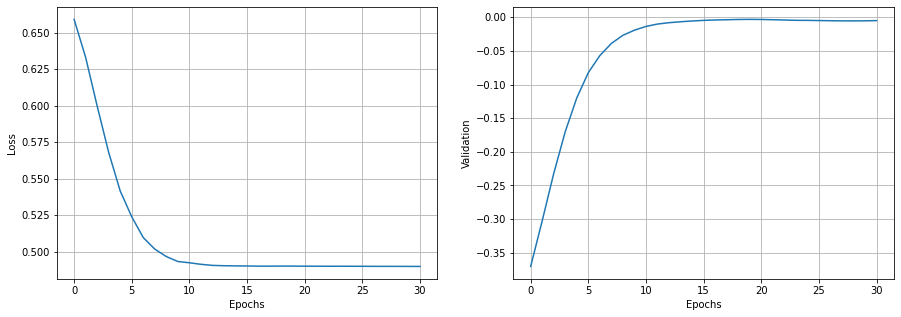

In [20]:
print("\nBest estimator loss and validation:\n")

plt.figure(figsize=(15,5))

axis1 = plt.subplot(1,2,1)
plt.plot(bestNN_7.best_estimator_.loss_curve_)
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("Loss")

axis2 = plt.subplot(1,2,2)
plt.plot(bestNN_7.best_estimator_.validation_scores_)
plt.grid(True)
plt.xlabel("Epochs")
plt.xticks(rotation=0)
plt.ylabel("Validation")
#plt.ylim(top=0.0)

plt.show()

## Deep Neural Network

Rede com duas camadas internas e, para o caso com dataset original, pesos inicializados tentanto explorar a correlação entre a variável de saída 'quality' e as variáveis de entrada 'volatile acidity' e 'alcohol'.

### Treinamento e teste com dataset F11


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 96        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
__________________________

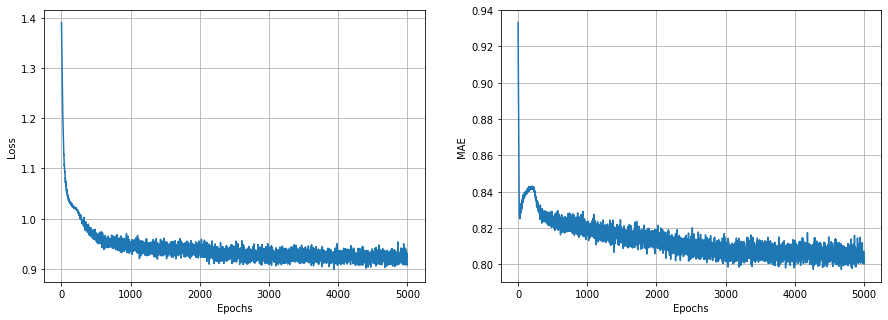

In [21]:
deep_regressor11 = Sequential()

# Camada de entrada

# Alterando pesos para alcohool e volatile acidity, os quais possuem correlação
# com quality de 0.48 e -0.40, respectivamente.

w1 = np.identity(11)
for i in range(0,11):
  for j in range(0,11):
    w1[i][j] = 1
    w1[i][j] = 1

for i in range(0,11):
  w1[1][i] = -1
  w1[10][i] = 2

kinit = tf.constant_initializer(w1)

input_layer = Dense(units=11,activation='relu', kernel_initializer=kinit)
input_layer = Dense(units=11,activation='relu')
deep_regressor11.add(input_layer)

# Duas camadas internas com dropout
deep_regressor11.add(Dense(units=8, activation= 'softmax'))
deep_regressor11.add(Dropout(rate=0.25))
deep_regressor11.add(Dense(4, activation='softmax'))
#Camada de saída
deep_regressor11.add(Dense(1, activation='sigmoid'))

# Compilação, treinamento e estimativa
deep_regressor11.compile(optimizer='adam', loss='mse', metrics='mae')
history = deep_regressor11.fit(F11_train, Y_train, epochs= 5000, batch_size= 100, verbose=0)
deep_regressor11.summary()

# Métrica
Y_pred = deep_regressor11.predict(F11_test)

MAE = metrics.mean_absolute_error(Y_test,Y_pred)

results['F11']['Deep NN'] = MAE

print("\n\nMAE: " + str(round(MAE,4)))

# Plot
print("\nDeep Neural Network loss and metrics:\n")

plt.figure(figsize=(15,5))

axis1 = plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("Loss")

axis2 = plt.subplot(1,2,2)
plt.plot(history.history['mae'])
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("MAE")

plt.show()

### Treinamento e teste com dataset F7


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
________________________

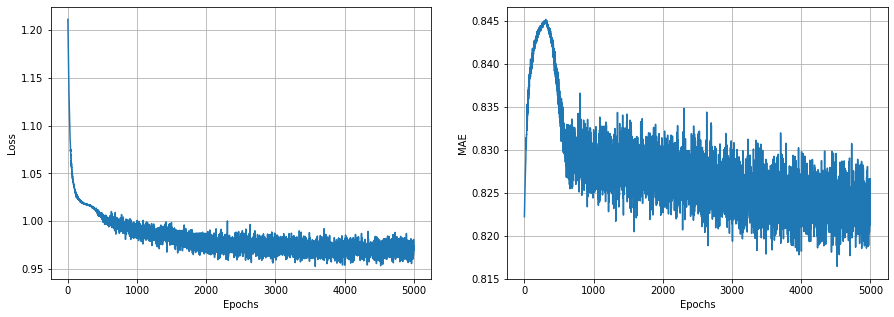

In [22]:
deep_regressor7 = Sequential()

# Camada de entrada
deep_regressor7.add(Dense(units=7,activation='relu'))
# Duas camadas internas com dropout
deep_regressor7.add(Dense(units=8, activation='softmax'))
deep_regressor7.add(Dropout(rate=0.25))
deep_regressor7.add(Dense(4, activation='softmax'))
#Camada de saída
deep_regressor7.add(Dense(1, activation='sigmoid'))

# Compilação, treinamento e estimativa
deep_regressor7.compile(optimizer='adam', loss='mse', metrics='mae')
history = deep_regressor7.fit(F7_train, Y_train, epochs=5000, batch_size=100, verbose=0)
deep_regressor7.summary()

# Métrica
Y_pred = deep_regressor7.predict(F7_test)

MAE = metrics.mean_absolute_error(Y_test,Y_pred)

results['F7']['Deep NN'] = MAE

print("\n\nMAE: " + str(round(MAE,4)))

# Plot
print("\nDeep Neural Network loss and metrics:\n")

plt.figure(figsize=(15,5))

axis1 = plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("Loss")

axis2 = plt.subplot(1,2,2)
plt.plot(history.history['mae'])
plt.xlabel("Epochs")
plt.grid(True)
plt.xticks(rotation=0)
plt.ylabel("MAE")

plt.show()

## Support Vector Machines, SVM

O objetivo de uma SVM é encontrar o melhor hiperplano que separa dois grupos de dados com uma pequena tolerância ε no processo de treinamento. A função custo (loss) ε-insensitive define um região retangular em torno de resíduos e os pequenos erros dentro dessa região são descartados.

$Loss(y,\hat{y}) = \{ \begin {align*} 0, \ \ \ \ &y-\hat{y} \leq \varepsilon,
\\ ky, \ \     &y-\hat{y} > \varepsilon, \ k \in \Re \end {align*}$
                                  
Foi adotado também o kernel gaussiano, o qual necessita apenas a definição do parâmetro $\gamma$.

$K(x,x') = e^{-\gamma ||x-x'||^{2}}, \gamma > 0$

Neste caso, a performance do modelo é influenciada por três parâmetros:

1. $\gamma$, relacionado ao kernel gaussiano;
2. $\varepsilon$, relacionado à função de custo; e
3. C, comum a todas as SVM, conhecido como parâmetro de regularização.

Dos três parâmetros, $\gamma$ exerce o maior impacto no desempenho de SVM, e o elegem como único hiperparâmetro para o modelo, definindo C = 3 por heurística, e $\varepsilon = \hat{\sigma}/\sqrt{N}$, onde

$\hat{\sigma} = \dfrac{1.5}{N} \Sigma_{i=1}^{N}(y_i-\hat{y_i})^2$

Com $\hat{y_i}$ estimado por algoritimo KNN, $K=3$.

### Definição do modelo e ajustes de sintonia

Como dito acima, será considerado como hiperparâmetro a ser sintonizado o parâmetro $\gamma$, relacionao ao kernel da SVM. os parâmetros relacionados à função loss ε-insensitive e regularização serão mantidos constantes.

O range para sintonia é de $2^{3}, 2^{1},..., 2^{-13}, 2^{-15}$ , e a avaliação de cada modelo é realizada por validação cruzada com 5 folds adotando como métrica de scoring o erro médio absoluto, MAE. O modelo escolhido com menor MAE é então retreinado com todo o dataset de treino.

In [23]:
# Regressor KNN com métrica de distância euclidiana (padrão)
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#

K = 3
KNN_regressor = KNeighborsRegressor(n_neighbors=K,weights='uniform')
KNN_regressor.fit(F11_train,Y_train)
Y_pred = KNN_regressor.predict(F11_test)

# Define a SVM base para sobre a qual será realizada a sintonia de gamma (hiperparâmetro)
# Epsilon Support Vector Machine para regressão empregando kernel gaussiano (RBF)
# C = 3 e metodologia de obtenção de sigma_hat com uso de KNN definido por Cortez et al.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#

sigma_hat = 1.5*metrics.mean_squared_error(Y_test,Y_pred)
epsilon = sigma_hat/math.sqrt(len(Y_test))
C = 3
gamma = 0 # Hiperparâmetro
SVM_regressor = SVR(kernel= 'rbf', C= 3.0, gamma= 'auto', epsilon= epsilon)

# Configura o processo de tunnig de gamma no modelo de SVM
# GridSearchCV
# Treina e avalia com cross-validation um estimator de forma iterativa sobre um conjunto de hiperparâmetros
# O range de gamm é definido por Cortez, et al. como 2^(3), 2^(1) ... 2^(-15).
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameters = {'gamma': [2**3, 2**1, 2**-1,2**-3,2**-5,2**-7,2**-9,2**-11,2**-13,2**-15]}
Kcv = 5     
modelSVM = GridSearchCV(estimator= SVM_regressor,
                        param_grid= parameters,
                        cv= Kcv,
                        scoring= 'neg_mean_absolute_error',
                       )

### Treinamento e teste com dataset F11

In [24]:
bestSVM_11 = modelSVM.fit(F11_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestSVM_11.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_gamma','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestSVM_11.predict(F11_test))

results['F11']['SVM'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F11: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()


 Mean absolute error of predictions made by model fitted with F11: 0.8064



,9,8,7,6,5,0,1,4,3,2
rank_test_score,1,2,3,4,5,6,7,8,9,10
param_gamma,3.05176e-05,0.00012207,0.000488281,0.00195312,0.0078125,8,2,0.03125,0.125,0.5
mean_test_score,-0.828413,-0.829367,-0.833231,-0.838981,-0.84883,-0.853637,-0.868993,-0.872739,-0.877606,-0.90672
std_test_score,0.019216,0.0191144,0.0186363,0.0173595,0.0143307,0.0149033,0.0245453,0.0212072,0.0138644,0.040623
split0_test_score,-0.829061,-0.830105,-0.834568,-0.845374,-0.872063,-0.860512,-0.855567,-0.913534,-0.883239,-0.866033
split1_test_score,-0.810023,-0.810568,-0.812436,-0.814181,-0.829794,-0.839298,-0.866123,-0.870021,-0.89206,-0.938308
split2_test_score,-0.804361,-0.805642,-0.811723,-0.823476,-0.840568,-0.832547,-0.831725,-0.865976,-0.874951,-0.85497
split3_test_score,-0.844029,-0.845953,-0.853153,-0.860148,-0.85577,-0.866297,-0.896235,-0.852545,-0.885647,-0.960259
split4_test_score,-0.854592,-0.854564,-0.854275,-0.851724,-0.845952,-0.86953,-0.895315,-0.861622,-0.852135,-0.91403


### Treinamento e teste com dataset F7

In [25]:
bestSVM_7 = modelSVM.fit(F7_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestSVM_7.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_gamma','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestSVM_7.predict(F7_test))

results['F7']['SVM'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F7: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()


 Mean absolute error of predictions made by model fitted with F7: 0.8062



,9,8,7,6,5,4,0,3,1,2
rank_test_score,1,2,3,4,5,6,7,8,9,10
param_gamma,3.05176e-05,0.00012207,0.000488281,0.00195312,0.0078125,0.03125,8,0.125,2,0.5
mean_test_score,-0.828202,-0.828391,-0.82936,-0.833867,-0.837797,-0.845557,-0.849462,-0.884749,-0.890624,-0.939906
std_test_score,0.0191878,0.0189946,0.0182933,0.0165537,0.0211809,0.0258012,0.0131757,0.0281083,0.0133208,0.0250468
split0_test_score,-0.828796,-0.828756,-0.829225,-0.833079,-0.827277,-0.830251,-0.856952,-0.864165,-0.891107,-0.915526
split1_test_score,-0.810208,-0.811249,-0.815342,-0.83003,-0.831652,-0.859027,-0.848983,-0.912011,-0.900613,-0.962517
split2_test_score,-0.803969,-0.803945,-0.8041,-0.806061,-0.806843,-0.802258,-0.824145,-0.839738,-0.866618,-0.906738
split3_test_score,-0.843411,-0.843402,-0.843504,-0.844804,-0.862762,-0.865021,-0.857352,-0.907288,-0.905116,-0.970037
split4_test_score,-0.854625,-0.854603,-0.85463,-0.855361,-0.860454,-0.87123,-0.859877,-0.900545,-0.889666,-0.944712


## Decision Tree, DT

Decision Trees (DTs) são métodos de aprendizado supervisionado usados para classificação e regressão. O objetivo é criar um modelo que estime o valor de um variável alvo ao aprender simples regras de decisão inferidas a partir das variáveis

### Definição do modelo e ajustes de sintonia

O hiperparâmetro para sintonia da Decision Tree é max_depth, que determina a profundida máxima onde uma folha não é mais dividida em um node.

In [26]:
# Define o modelo de Decision Tree sobre o qual será realizada a sintonia de max_depth (hiperparâmetro)

# DecisionTreeRegressor:
#   A decision tree regressor.
#   
# Foi definida como função para avaliar a qualidade da folha o MAE. Todos os parâmetros foram deixados
# por padrão, exceto a profundidade (ou altura) da árvore.

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Tree_regressor = tree.DecisionTreeRegressor(criterion='mae')

# Configura o processo de tunnig de max_depth no modelo Decision Tree
# GridSearchCV
# Executa cross-validation em um estimator de forma iterativa sobre um conjunto de hiperparâmetros
# O range fo definido empiricamente após testes
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

parameters = {'max_depth': [5,10,15,20,25,30,35,40,45]}
Kcv = 5
modelTree = GridSearchCV(estimator= Tree_regressor,
                       param_grid= parameters,
                       cv= Kcv,
                       scoring= 'neg_mean_absolute_error',
                      )

### Treinamento e teste com dataset F11

In [27]:
bestTree_11 = modelTree.fit(F11_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestTree_11.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_max_depth','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestTree_11.predict(F11_test))

results['F11']['DT'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F11: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()


 Mean absolute error of predictions made by model fitted with F11: 0.8753



,0,1,2,4,3,6,7,5,8
rank_test_score,1,2,3,4,5,6,7,8,9
param_max_depth,5,10,15,25,20,35,40,30,45
mean_test_score,-0.870506,-0.897836,-0.919615,-0.926317,-0.937497,-0.953129,-0.954233,-0.959851,-1.00569
std_test_score,0.021051,0.0418323,0.0578462,0.0510607,0.0766608,0.0657783,0.0348362,0.0632465,0.0682117
split0_test_score,-0.885923,-0.891494,-0.919354,-0.913782,-0.930497,-0.9695,-0.975072,-0.930497,-0.936069
split1_test_score,-0.835776,-0.936069,-0.963928,-0.986216,-0.986216,-0.991787,-1.00293,-1.02522,-1.08651
split2_test_score,-0.890005,-0.954377,-0.99076,-0.96837,-1.03554,-1.04114,-0.962773,-1.02435,-1.06913
split3_test_score,-0.884408,-0.862018,-0.9012,-0.92359,-0.929188,-0.912395,-0.92359,-0.962773,-1.01875
split4_test_score,-0.85642,-0.845225,-0.822835,-0.839627,-0.806042,-0.850822,-0.906798,-0.85642,-0.917993


### Treinamento e teste com dataset F7

In [28]:
bestTree_7 = modelTree.fit(F7_train,Y_train)

# Exibe resultados do processo de validação cruzada com 5 folds

cv_results = pd.DataFrame(data=bestTree_7.cv_results_).drop('params',axis=1)
cv_results = cv_results[['rank_test_score','param_max_depth','mean_test_score','std_test_score',
                                       'split0_test_score', 'split1_test_score','split2_test_score','split3_test_score','split4_test_score']]

MAE = metrics.mean_absolute_error(Y_test, bestTree_7.predict(F7_test))

results['F7']['DT'] = MAE

print("\n Mean absolute error of predictions made by model fitted with F7: "
      + str(round(MAE,4))
      + "\n"
)

cv_results.sort_values(by='rank_test_score').transpose()



 Mean absolute error of predictions made by model fitted with F7: 0.8351



,0,1,2,3,4,6,5,8,7
rank_test_score,1,2,3,4,5,6,7,8,9
param_max_depth,5,10,15,20,25,35,30,45,40
mean_test_score,-0.855963,-0.902386,-0.919657,-0.939813,-0.953201,-0.968797,-0.986642,-0.991171,-1.00566
std_test_score,0.0290365,0.0244647,0.0270206,0.021035,0.0331532,0.0501734,0.0354105,0.0257422,0.0236236
split0_test_score,-0.852491,-0.863635,-0.902638,-0.924925,-0.891494,-0.963928,-0.991787,-0.9695,-1.00293
split1_test_score,-0.858063,-0.885923,-0.936069,-0.90821,-0.991787,-1.00293,-1.04751,-1.01407,-1.04751
split2_test_score,-0.817237,-0.909596,-0.87881,-0.951578,-0.957175,-0.895603,-0.94598,-0.951578,-1.00196
split3_test_score,-0.845225,-0.92359,-0.957175,-0.94598,-0.962773,-1.04114,-0.957175,-1.00755,-0.973968
split4_test_score,-0.906798,-0.929188,-0.92359,-0.96837,-0.962773,-0.940383,-0.99076,-1.01315,-1.00196


# Resumo

In [29]:
print(results)

              F11        F7
MLP      0.822756  0.828662
Deep NN  0.841568  0.867124
SVM      0.806435  0.806228
DT        0.87527  0.835079
